In [29]:
# ASCII Imager
# First, define some stuff
from PIL import Image
import numpy as np
from glob import glob

working_dir = '/Users/walach/Box Sync/python/lunchclub/'

In [30]:
# Define ASCII character map - two grey scales here:
gscale1 = "$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~i!lI;:,\"^`."    #70 levels of grey
gscale2 = "@%#*+=-:. "         #10 levels of grey

# Define size of final image: 
cols = 120  # an arbitrary number I picked
scale = 1./np.sqrt(2) # same aspect ratio as Din format

In [31]:
# In this block, we will read in the image
im_files = glob(working_dir+'iu*')
im_files.sort()

image = Image.open(im_files[0]).convert('L')

print(image.format, image.size, image.mode)

None (474, 490) L


In [34]:
# In this block, we will downsample the image:

# Define a function to get the average brightness of an image:
def getAverageL(image):
    # get image as numpy array
    im = np.array(image)
    # get shape
    w,h = im.shape
    # get average
    return np.average(im.reshape(w*h))


# first, store dimensions
W, H = image.size[0], image.size[1]
# compute width of tile
w = W/cols
# compute tile height based on aspect ratio and scale
h = w/scale
# compute number of rows
rows = int(H/h)

# ascii image is a list of character strings
aimg = []
# generate list of dimensions
for j in range(rows):
    y1 = int(j*h)
    y2 = int((j+1)*h)
    # correct last tile
    if j == rows-1:
        y2 = H
    # append an empty string
    aimg.append("")
    for i in range(cols):
        # crop image to tile
        x1 = int(i*w)
        x2 = int((i+1)*w)
        # correct last tile
        if i == cols-1:
            x2 = W
        # crop image to extract tile
        img = image.crop((x1, y1, x2, y2))
        # get average brightness
        avg = int(getAverageL(img))
        # look up ascii char
        try:
            moreLevels
        except NameError:
            gsval = gscale2[int((avg*9)/255)]
        else:
            gsval = gscale1[int((avg*69)/255)] 
        # append ascii char to string
        aimg[j] += gsval


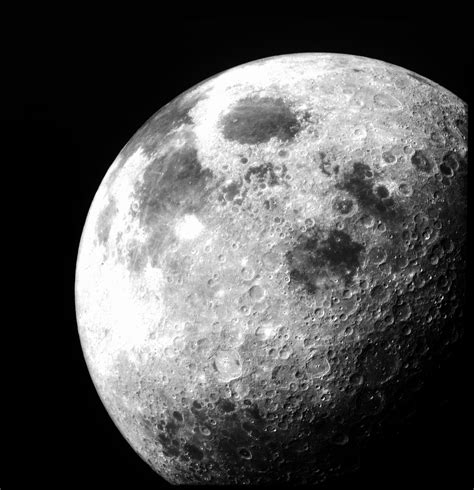

In [36]:
im

In [37]:
aimg

['@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@',
 '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@',
 '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@',
 '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@',
 '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@',
 '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@',
 '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@',
 '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@',
